In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [3]:
#Read data
spiral = np.loadtxt("spiral.txt")
x, y = spiral[:, :2], spiral[:, 2]

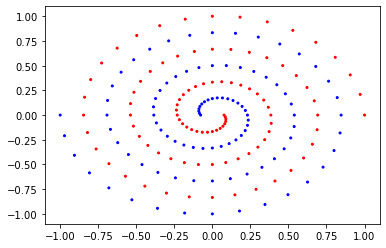

In [12]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='bwr',s=4)

In [9]:
def plot_svm_decision(X, y, model_class, **model_params):
    #Fit model
    model = model_class(**model_params)
    model.fit(X, y)
    
    #Define grid
    h = .001     
    x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
    y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    
    #Prediction on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    #Contour + scatter plot
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.4, cmap='coolwarm')
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.savefig('spiral.png', transparent=True, dpi=200)
    return plt

<module 'matplotlib.pyplot' from 'D:\\ProgramData\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

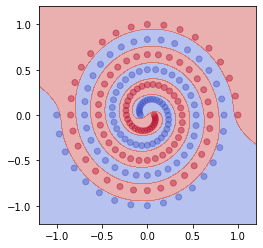

In [10]:
plot_svm_decision(x,y,svm.SVC,C=100,kernel='rbf',gamma=20)
#plt.clf()